In [1]:
#How u treat the outliers?





In [2]:
#Write a python program to do hypothesis testing?

# def hyp_testing(mean,sd,sample_mean,n,flag,flag_t):
#     # automatically be able to decide t test or z-test (if n <30 t test, if n >30 z test)
#     #eitherhyp test or interval estimate or point estimate
#     #alpha values dictionaries for z and t for z = 0.05 and 0.025
#     #use alpha = 0.05
#     #one tail or two tail
    
# return null rejected/selected

#pass the values
#make use of exception

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.stats import ttest_ind
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')

cereal = pd.read_csv('E:\Learnbay_Assignments\Data\Cereal.csv')
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
cereal.shape

(77, 16)

In [5]:
hot_cereal = cereal.loc[cereal['type'] == 'H',:]
cold_cereal = cereal.loc[cereal['type'] == 'C',:]

In [6]:
ttest_ind(cold_cereal['sugars'],hot_cereal['sugars'],equal_var = False) # pvalue less than 0.05 mean # 95% confidence
#p-value is less than 0.05 reject the hypothesis that sugar levels are same. Sugar levels are diff with 95% CI
#tetest is doint the hypothesis testing where it takes all the data there is no sampling involved

Ttest_indResult(statistic=4.994846451755555, pvalue=0.01874372013190692)

In [7]:
ttest_ind(cold_cereal['calories'],hot_cereal['calories'],equal_var = False) #p-value is less than 0.05 so we reject the null hypothesis
#calories values in both types are different with 95% CI level 

Ttest_indResult(statistic=3.1070612896033047, pvalue=0.002691710812554955)

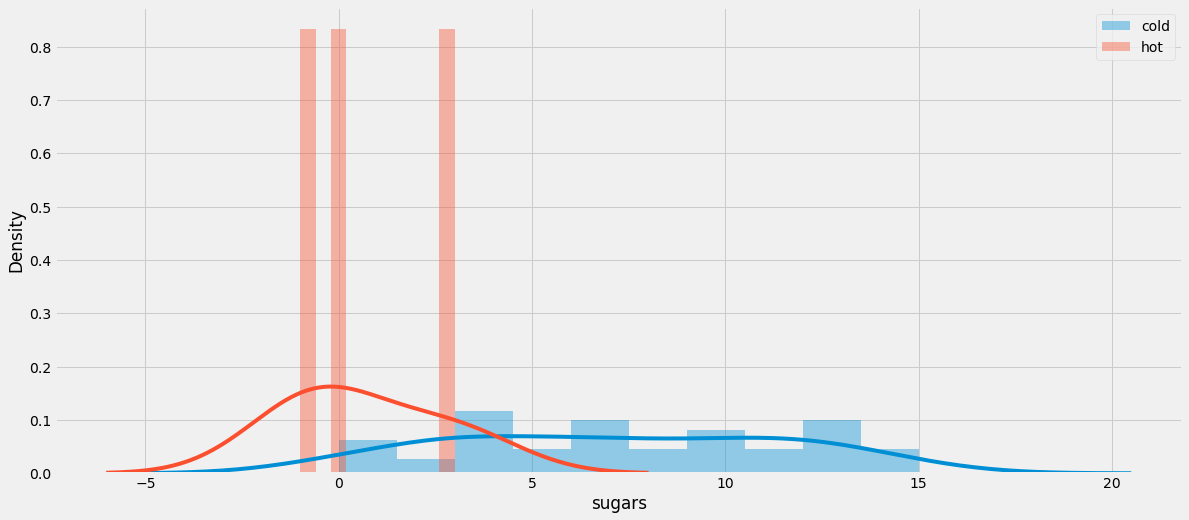

In [8]:
# how to verify that type 1 and type 2 errors not there
ax = plt.subplots(figsize=(18,8))
sns.distplot(cold_cereal['sugars'],bins =10,hist = True,label = 'cold')

sns.distplot(hot_cereal['sugars'],bins =10,hist = True,label = 'hot')
plt.legend()

#theres no overlap in the graphs so the sugar levels in both creals are different
#Both are having diff distributions and the values are also diff so it tells that they are not related (double check)

#still we say 95% CI cause internally it takes significance level as 0.05 i.e. 5% of outliers
#the data is processed by ttest is sampled already

In [10]:
my_data = pd.read_csv('E:\Learnbay_Assignments\Data\hypothesis_testing.csv')
my_data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [11]:
current = my_data['Current']
new = my_data['New']

In [12]:
#two sample t-test
ttest_ind(current,new)

# to find relation between current sales and new sales
#p-value is 0.18 greateer than 0.05 i.e. alpha
#null hypotheesis is accepeted i.e. current and new are same

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

In [13]:
# two sample z-test

from statsmodels.stats import weightstats as stests

ztest,pval1 = stests.ztest(current, x2=new,alternative = 'two-sided')#ztest where we are paasing current nd new columns and 
#it is two tailed as alternative parameter
print(float(pval1))

#p-val is same in t test and test (3rd check)

0.18405868087594723
